In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

In [3]:
np.random.permutation(np.arange(10))

array([8, 5, 9, 3, 0, 4, 1, 7, 2, 6])

In [3]:
def print_full(x):
    with pd.option_context('display.max_rows', 1000):
        print(x)
pd.options.display.float_format = '{:.5f}'.format

In [5]:
train = pd.read_csv('../../data/train_data.csv')
test = pd.read_csv('../../data/test_data.csv')
submission = pd.read_csv('../../data/sample_submission.csv')

# 기본 정보
- `userID`
    - 유저 ID
    - 0 ~ 7441 총 6698명의 유저
- `assessmentItemID`
    - 문항 ID
    - A[문제지 정보 6자리][문항정보 3자리]
- `testId`
    - 문제지 ID
    - A[문제지 정보 3자리]000[문제지 정보 3자리]
- `answerCode`
    - 정답 여부
    - 0 or 1
- `Timestamp`
    - 문제를 푼 시간
- `KnowledgeTag`
    - 문제 범주

In [15]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 103.8+ MB


In [11]:
train.isna().sum()

userID              0
assessmentItemID    0
testId              0
answerCode          0
Timestamp           0
KnowledgeTag        0
dtype: int64

In [12]:
train.nunique()

userID                 6698
assessmentItemID       9454
testId                 1537
answerCode                2
Timestamp           2076774
KnowledgeTag            912
dtype: int64

In [18]:
test.nunique()

userID                 744
assessmentItemID      9454
testId                1537
answerCode               3
Timestamp           256622
KnowledgeTag           912
dtype: int64

In [14]:
train.describe()

,userID,answerCode,KnowledgeTag
count,2266586.00000,2266586.00000,2266586.00000
mean,2087.68664,0.65438,4909.00708
std,1589.36540,0.47557,3302.21444
min,0.00000,0.00000,23.00000
25%,800.00000,0.00000,1931.00000
50%,1748.00000,1.00000,5258.00000
75%,3046.00000,1.00000,7913.00000
max,7441.00000,1.00000,11271.00000


In [16]:
test.describe()

,userID,answerCode,KnowledgeTag
count,260114.00000,260114.00000,260114.00000
mean,2042.98180,0.65217,4909.84251
std,1551.39982,0.48225,3309.80729
min,3.00000,-1.00000,23.00000
25%,802.00000,0.00000,1934.00000
50%,1750.00000,1.00000,5259.00000
75%,2910.00000,1.00000,7912.00000
max,7439.00000,1.00000,11271.00000


In [7]:
train.shape

(2266586, 6)

In [9]:
print_full(train[train['userID']==0].sort_values(by='Timestamp'))

     userID assessmentItemID      testId  answerCode            Timestamp  \
0         0       A060001001  A060000001           1  2020-03-24 00:17:11   
1         0       A060001002  A060000001           1  2020-03-24 00:17:14   
2         0       A060001003  A060000001           1  2020-03-24 00:17:22   
3         0       A060001004  A060000001           1  2020-03-24 00:17:29   
4         0       A060001005  A060000001           1  2020-03-24 00:17:36   
5         0       A060001007  A060000001           1  2020-03-24 00:17:47   
6         0       A060003001  A060000003           0  2020-03-26 05:52:03   
7         0       A060003002  A060000003           1  2020-03-26 05:52:10   
8         0       A060003003  A060000003           1  2020-03-26 05:53:14   
9         0       A060003004  A060000003           1  2020-03-26 05:53:29   
10        0       A060003005  A060000003           1  2020-03-26 05:53:48   
11        0       A060003006  A060000003           1  2020-03-26 05:53:55   

# 유저 분석
- 유저 별 푼 문항 수 분포
- 유저 별 정답률 분포
- 유저 별 푼 카테고리 가지 수 분포

# 문제 분석
- 문제지 별 문항 수 분포
- 태그 별 문항 수, 정답률 분포

In [5]:
train.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag'],
      dtype='object')

In [6]:
user_groupby = train.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': lambda x: x.sum()/len(x),
    'KnowledgeTag': lambda x: x.nunique()
})
user_groupby.describe()

,assessmentItemID,answerCode,KnowledgeTag
count,6698.00000,6698.00000,6698.00000
mean,338.39743,0.62891,65.81099
std,321.33143,0.15964,56.08459
min,9.00000,0.00000,2.00000
25%,78.00000,0.52727,19.00000
50%,231.50000,0.65176,51.00000
75%,513.00000,0.75120,99.00000
max,1860.00000,1.00000,342.00000


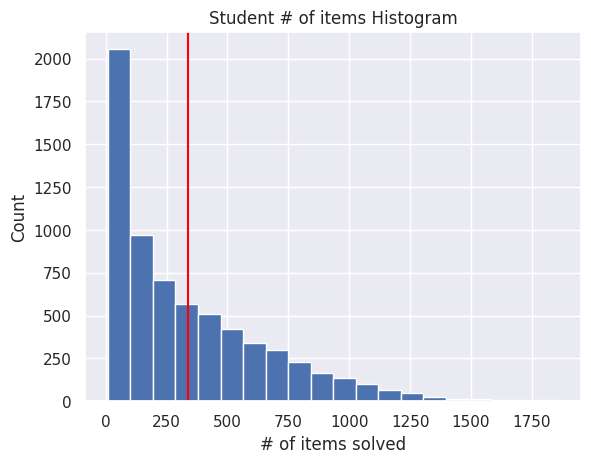

In [7]:
# 유저 별 푼 문항 수 분포
fig, ax = plt.subplots()

user_groupby['assessmentItemID'].hist(bins=20, ax=ax)

ax.set_title('Student # of items Histogram')
ax.set_xlabel('# of items solved')
ax.set_ylabel('Count')
ax.axvline(user_groupby['assessmentItemID'].mean(), color='red')
ax.grid(visible=True)

plt.show()

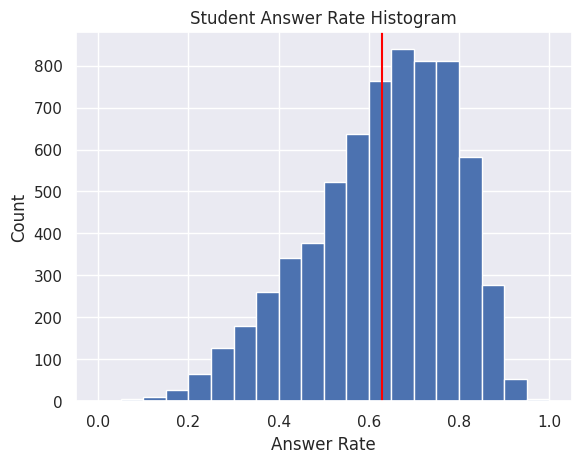

In [8]:
# 유저 별 정답률 분포
fig, ax = plt.subplots()

user_groupby['answerCode'].hist(bins=20, ax=ax)

ax.set_title('Student Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(user_groupby['answerCode'].mean(), color='red')
ax.grid(visible=True)

plt.show()

In [9]:
item_groupby = train.groupby('assessmentItemID').agg({
    'userID': 'count',
    'answerCode': lambda x: x.sum()/len(x),
})
item_groupby.describe()

,userID,answerCode
count,9454.00000,9454.00000
mean,239.74889,0.65426
std,71.89379,0.19549
min,43.00000,0.04943
25%,220.00000,0.50555
50%,230.00000,0.66667
75%,271.00000,0.82051
max,454.00000,0.99631


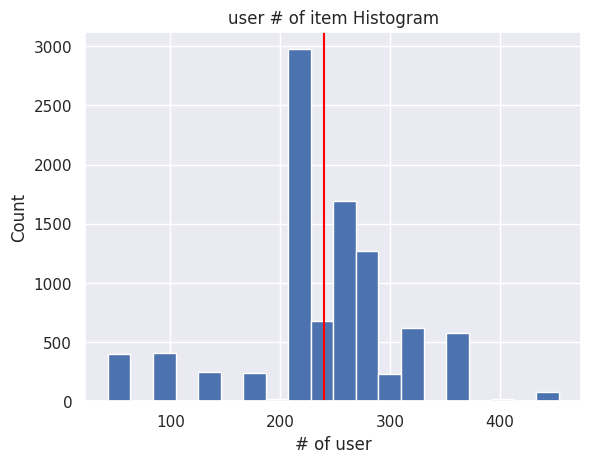

In [12]:
# 아이템 별 유저 수 분포
fig, ax = plt.subplots()

item_groupby['userID'].hist(bins=20, ax=ax)

ax.set_title('user # of item Histogram')
ax.set_xlabel('# of user')
ax.set_ylabel('Count')
ax.axvline(item_groupby['userID'].mean(), color='red')
ax.grid(visible=True)

plt.show()

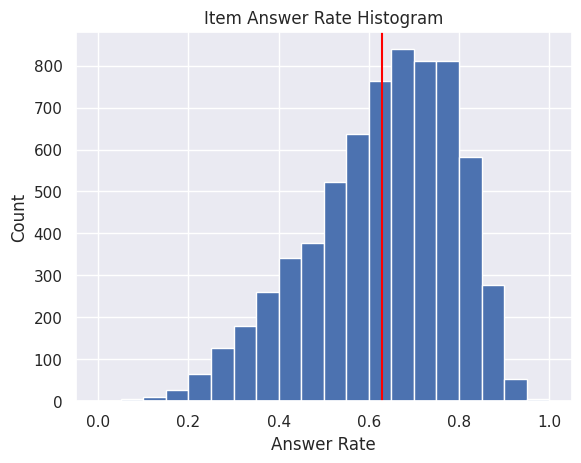

In [13]:
# 아이템 별 정답률 분포
fig, ax = plt.subplots()

user_groupby['answerCode'].hist(bins=20, ax=ax)

ax.set_title('Item Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(user_groupby['answerCode'].mean(), color='red')
ax.grid(visible=True)

plt.show()

In [12]:
train.iloc[train_index,:]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
5,0,A060001007,A060000001,1,2020-03-24 00:17:47,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [8]:
train_index

array([      0,       1,       2, ..., 2266583, 2266584, 2266585])

In [15]:
columns = ["userID", "assessmentItemID", "testId", "answerCode", "KnowledgeTag"]
group = (
            train[columns]
            .groupby("userID")
            .apply(
                lambda r: (
                    r["testId"].values,
                    r["assessmentItemID"].values,
                    r["KnowledgeTag"].values,
                    r["answerCode"].values,
                )
            )
        )

In [52]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
idx = kf.split(group.values)
for fold, (train_idx, valid_idx) in enumerate(kf.split(group.values)):
    print(f'{fold}')
    print(group.values[train_idx].shape)
    print(group.values[valid_idx].shape)
    train_tmp = group.values[train_idx]
    valid_tmp = group.values[valid_idx]

0
(5358,)
(1340,)
1
(5358,)
(1340,)
2
(5358,)
(1340,)
3
(5359,)
(1339,)
4
(5359,)
(1339,)


In [49]:
train_tmp[0][0]

array(['A060000001', 'A060000001', 'A060000001', 'A060000001',
       'A060000001', 'A060000001', 'A060000003', 'A060000003',
       'A060000003', 'A060000003', 'A060000003', 'A060000003',
       'A060000003', 'A060000005', 'A060000005', 'A060000005',
       'A060000005', 'A060000005', 'A060000005', 'A060000005',
       'A060000007', 'A060000007', 'A060000007', 'A060000007',
       'A060000007', 'A060000007', 'A060000007', 'A080000002',
       'A080000002', 'A080000002', 'A080000002', 'A080000002',
       'A080000002', 'A060000009', 'A060000009', 'A060000009',
       'A060000009', 'A060000009', 'A060000009', 'A060000009',
       'A060000016', 'A060000016', 'A060000016', 'A060000016',
       'A060000016', 'A060000016', 'A060000016', 'A080000004',
       'A080000004', 'A080000004', 'A080000004', 'A080000004',
       'A080000004', 'A080000004', 'A080000004', 'A080000006',
       'A080000006', 'A080000006', 'A080000006', 'A080000006',
       'A080000006', 'A080000006', 'A080000006', 'A0600

In [38]:
next(idx)

(array([   0,    1,    2, ..., 6695, 6696, 6697]),
 array([   7,   10,   28, ..., 6683, 6686, 6689]))

In [14]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
for train_index, valid_index in kf.split(train):
    print(train.iloc[train_index,:].shape)
    print(train.iloc[valid_index,:].shape)

(1813268, 6)
(453318, 6)
(1813269, 6)
(453317, 6)
(1813269, 6)
(453317, 6)
(1813269, 6)
(453317, 6)
(1813269, 6)
(453317, 6)


In [64]:
tmp = {'asdf':'d', 'dfg':'e'}
'_'.join(tmp.values())

'd_e'